In [6]:
# importing the necessary libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
# defining image size,train and test paths
IMAGE_SIZE = [224, 224]
train_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/valid'

In [8]:
# defining the inception model
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [9]:
for layer in inception.layers:
    layer.trainable = False

In [10]:
folders = glob('/kaggle/input/tomato/New Plant Diseases Dataset(Augmented)/train/*')

In [11]:
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [13]:
# model structure

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
# compiling the model

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [17]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [19]:
# training the model

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
574/574 [==============================] - 371s 646ms/step - loss: 2.7587 - accuracy: 0.6816 - val_loss: 1.9073 - val_accuracy: 0.7701
Epoch 2/10
574/574 [==============================] - 235s 410ms/step - loss: 1.9571 - accuracy: 0.7975 - val_loss: 2.0951 - val_accuracy: 0.7906
Epoch 3/10
574/574 [==============================] - 234s 407ms/step - loss: 2.0911 - accuracy: 0.8172 - val_loss: 2.7212 - val_accuracy: 0.7987
Epoch 4/10
574/574 [==============================] - 232s 404ms/step - loss: 1.9950 - accuracy: 0.8389 - val_loss: 2.7063 - val_accuracy: 0.8094
Epoch 5/10
574/574 [==============================] - 234s 407ms/step - loss: 1.8710 - accuracy: 0.8553 - val_loss: 3.0220 - val_accuracy: 0.7921
Epoch 6/10
574/574 [==============================] - 236s 411ms/step - loss: 1.9158 - accuracy: 0.8611 - val_loss: 2.1771 - val_accuracy: 0.8454
Epoch 7/10
574/574 [==============================] - 233s 406ms/step - loss: 1.7078 - accuracy: 0.8768 - val_loss: 2.2661 -

In [20]:
import matplotlib.pyplot as plt

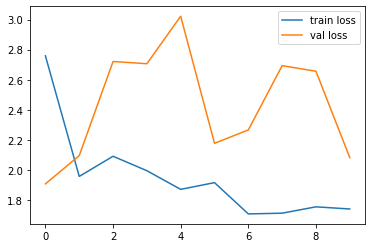

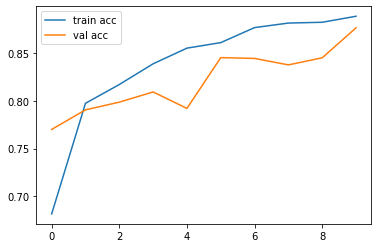

<Figure size 432x288 with 0 Axes>

In [22]:
# plotting the loss


plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')